- **Project Name -TITANIC SURVIVAL PREDICTION**
- **Developed By - Aarchi Jain (aarchi0212@gmail.com)**
- **Branch Name- Information Technology**
- **Institute Name- Dr. Akhilesh Das Gupta Institute Of Technology And Management**
- **Submitted To - CodSoft**

## Problem Statement

**Task -1 (Titanic Survival Preduction)**

- Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. 
- The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Reading data

In [2]:

data=pd.read_csv("D:/Aarchi Jain/Data science intership material/titanic dataset.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
data_num = data[['Age','SibSp','Parch','Fare','Pclass']]
data_cat = data[['Survived','Sex','Ticket','Cabin','Embarked']]

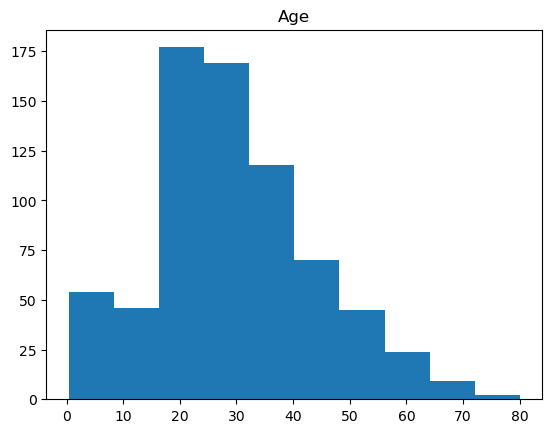

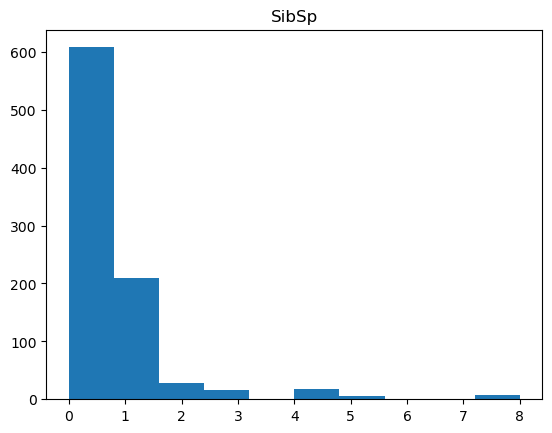

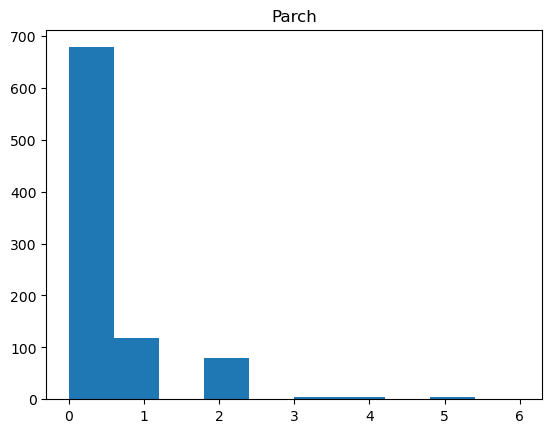

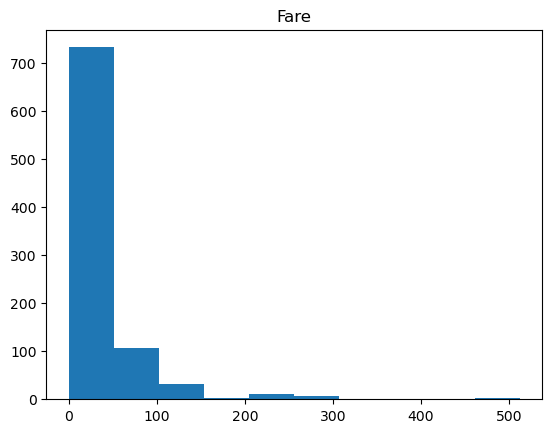

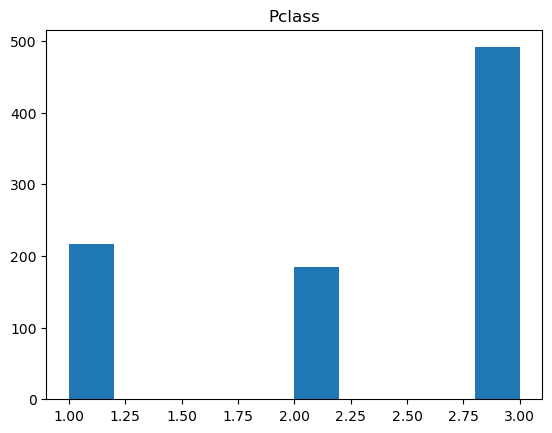

In [7]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

From the Above Graphs we can infer that:
1. Most of people travelling are of age (20-30).
2. most of child have only 1 sibling or no sibling.
3. Most Number of Parents/Children Aboard are between (0-1).
4. Fair rate of most people are between (0-50).
5. The majority of the people traveling, had tickets to the 3rd class

<Axes: >

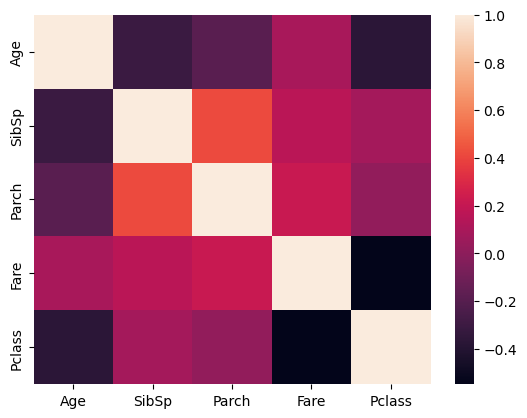

In [8]:
sns.heatmap(data_num.corr())

In [9]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


From this table we can inference that...
1. The average age of survivors is 28, so young people tend to survive more.
2. People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived..
3. In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
4. And if you are a child, and dont have siblings, you have more chance of surviving.


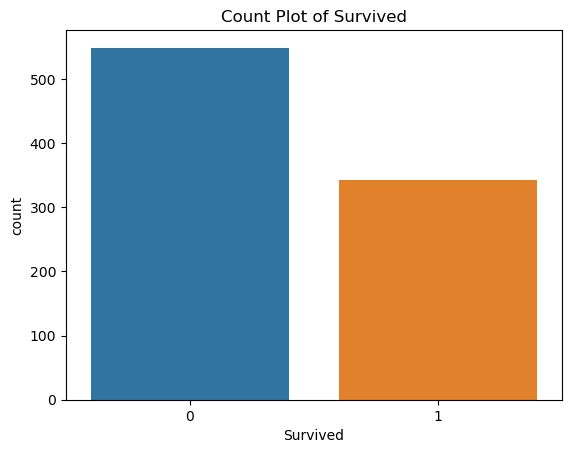

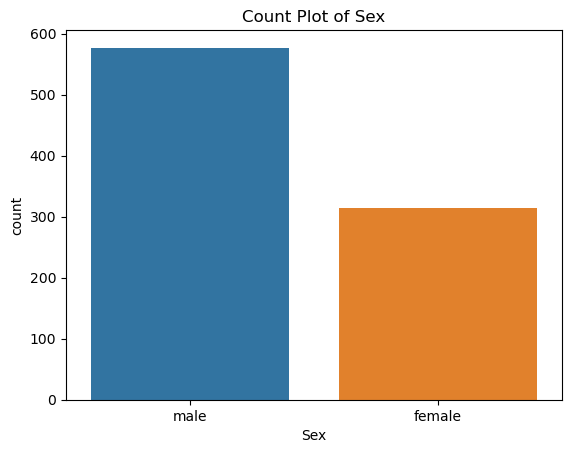

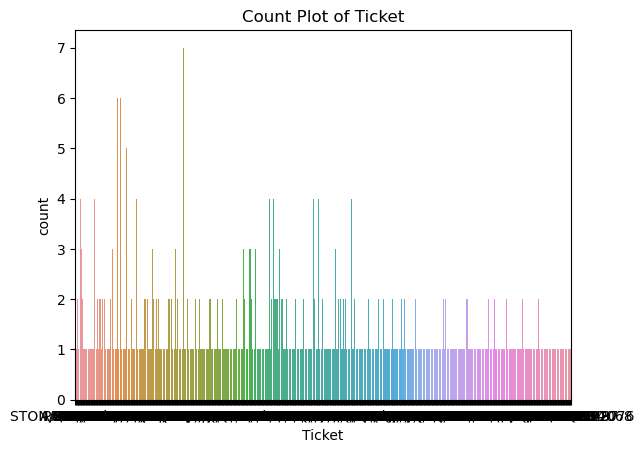

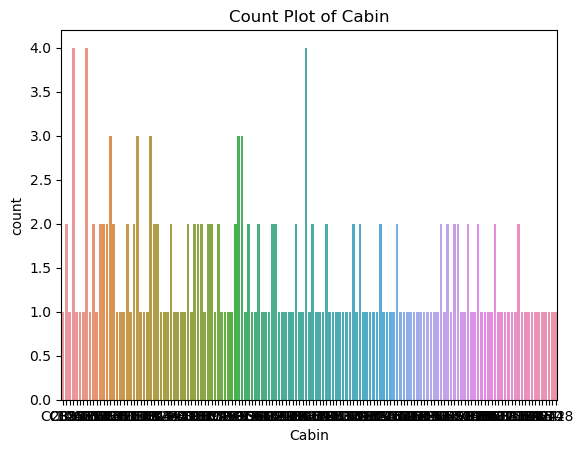

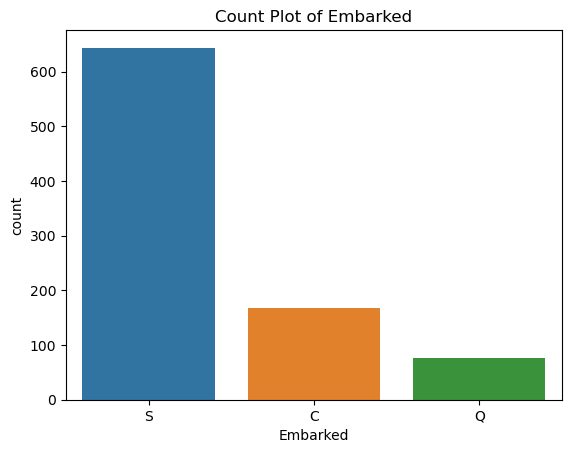

In [10]:
for col in data_cat:
    sns.countplot(x=data_cat[col])
    plt.xticks()
    plt.title(f'Count Plot of {col}')
    plt.show()

1. Survived: Most of the people died in the shipwreck,only around 300 people survived.
2. Sex: There were more males than females aboard the ship, roughly double the amount.
3. Embarked: Most of the passengers boarded the ship from Southampton.

<Axes: xlabel='Survived', ylabel='count'>

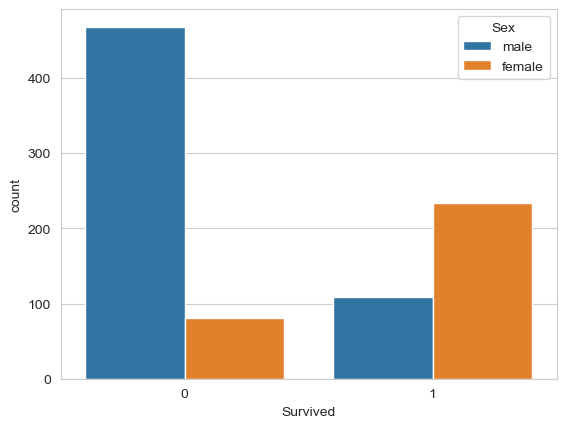

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=data)

analysing above graph we can say most of women survived and men died in shipwreck

<Axes: xlabel='Survived', ylabel='count'>

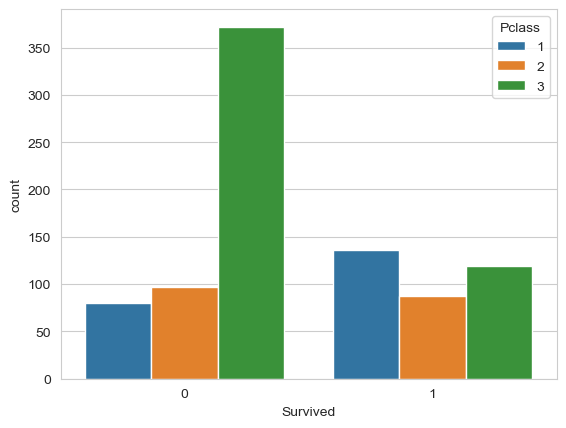

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=data)

Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.

<Axes: xlabel='Survived', ylabel='count'>

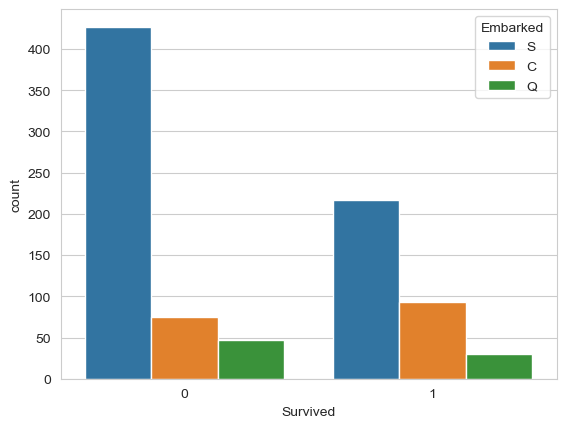

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Embarked',data=data)

previously we analyse that Most of the passengers boarded the ship from Southampton here most of people who are of Southampton survived more than others.This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving. 

## Feature Engineering 

In [14]:
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

## Data preprocessing for model

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
name_title       0
dtype: int64

<Axes: >

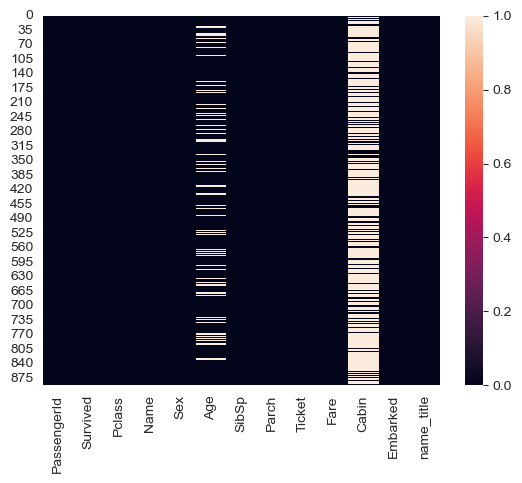

In [16]:
sns.heatmap(data.isnull())

we can see cabin most of values are null even we did not need in are model so we drop cabin column.

In [17]:
col=['Cabin','Ticket','Name','name_title']
data=data.drop(col, axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [18]:
print(f"Max value of age column : {data['Age'].max()}")
print(f"Min value of age column : {data['Age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [19]:
bins = [0, 5, 17, 25, 50,80 ]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data['Age'] = pd.cut(data['Age'], bins = bins, labels=labels)

In [20]:
pd.DataFrame(data['Age'].value_counts())

,Age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [21]:
data =data.fillna({'Age' : data['Age'].mode()[0]})
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,Young,1,0,7.2500,S
1,2,1,1,female,Adult,1,0,71.2833,C
2,3,1,3,female,Adult,0,0,7.9250,S
3,4,1,1,female,Adult,1,0,53.1000,S
4,5,0,3,male,Adult,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Adult,0,0,13.0000,S
887,888,1,1,female,Young,0,0,30.0000,S
888,889,0,3,female,Adult,1,2,23.4500,S
889,890,1,1,male,Adult,0,0,30.0000,C


We are done with ‘Age’ column. Yes! It’s time for ‘embarked’ column

In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
print(f"How many 'S' on embarked column : {data[data['Embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data[data['Embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data[data['Embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


<Axes: >

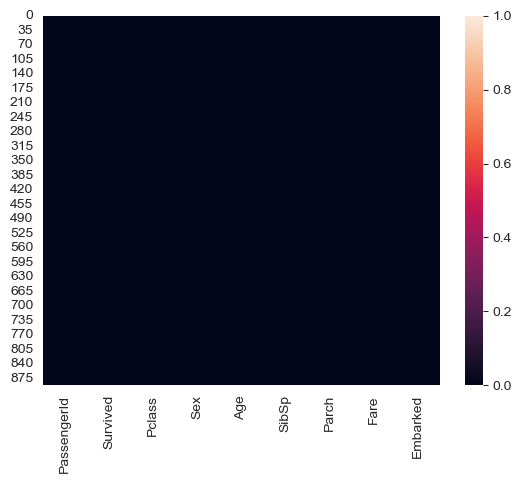

In [24]:
sns.heatmap(data.isnull())

now there is no null value

In [25]:
print(f"Max value of Fare column : {data['Fare'].max()}")
print(f"Min value of Fare column : {data['Fare'].min()}")

Max value of Fare column : 512.3292
Min value of Fare column : 0.0


In [26]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low','medium-low','medium','high']
data['Fare'] = pd.cut(data["Fare"], bins = bins, labels = labels)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,Young,1,0,low,S
1,2,1,1,female,Adult,1,0,high,C
2,3,1,3,female,Adult,0,0,medium-low,S
3,4,1,1,female,Adult,1,0,high,S
4,5,0,3,male,Adult,0,0,medium-low,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Adult,0,0,medium-low,S
887,888,1,1,female,Young,0,0,medium,S
888,889,0,3,female,Adult,1,2,medium,S
889,890,1,1,male,Adult,0,0,medium,C


<Axes: xlabel='Fare', ylabel='Survived'>

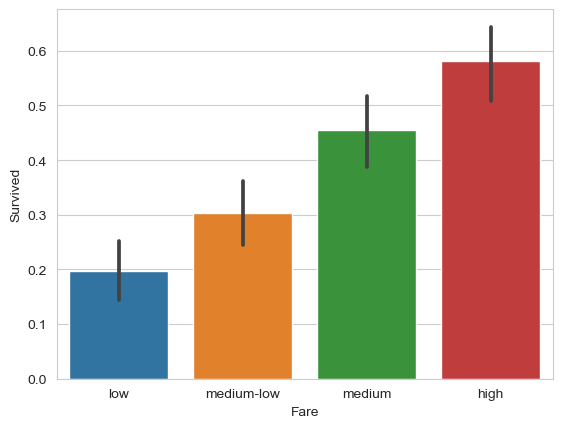

In [27]:
sns.set_style("whitegrid")
sns.barplot(x='Fare',y='Survived',data=data)

from this we can analyse people who pay high fare are survived more.

We cannot put them to our train and test data. We need to convert them into numeric values. You have two options for that; Label Encoder, and Pandas get_dummies method. I am going to use get_dummies.

In [28]:
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data = pd.get_dummies(data[dummies])
dummy_data

,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,0,1,0,0,0,0,1,0,0,0,1,1,0
889,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [29]:
dummy_data.shape

(891, 14)

In [30]:
data_1 = pd.concat([data, dummy_data], axis = 1)
data_1.drop(dummies, axis=1, inplace=True)

In [31]:
data_1.shape

(891, 19)

Now we have 891 rows, 19 columns. We are ready to build our model.

# Dividing data into Dependent and Indepenedent values 

In [32]:
X = data_1.drop('Survived', axis = 1)
y = data_1['Survived']
## we use 35% of data in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predicate=log_reg.predict(X_train)
y_pred_test=log_reg.predict(X_test)

C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_predicate, y_train))

0.8202247191011236


In [37]:
print(accuracy_score(y_pred_test,y_test))

0.8059701492537313


## Fitting Naive bayes to training dataset

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
cla_x=classifier.predict(X_train)
cla=classifier.predict(X_test)

In [40]:
print(accuracy_score(cla_x,y_train))

0.7913322632423756


In [41]:
print(accuracy_score(cla,y_test))

0.7798507462686567


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_train)
y_predict_test=classifier.predict(X_test)

In [57]:
print(accuracy_score(y_predict, y_train))

0.9983948635634029


In [58]:
print(accuracy_score(y_predict_test, y_test))

0.832089552238806


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
classifier= DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[17] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.25, 0.5, 'x[1] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 Text(0.75, 0.5, 'x[8] <= 0.5\ngini = 0.302\nsamples = 410\nvalue = [334, 76]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.27\nsamples = 391\nvalue = [328, 63]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]')]

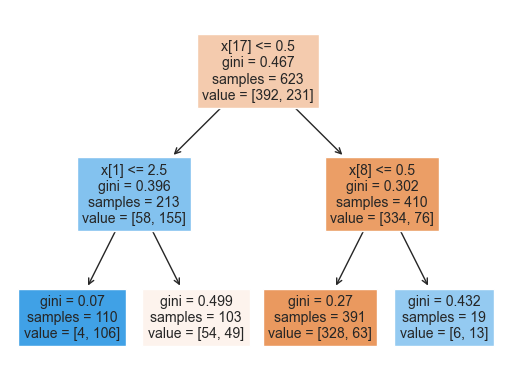

In [48]:
from sklearn import tree
tree.plot_tree(classifier,filled=True)

In [49]:
y_predict=classifier.predict(X_train)
y_pred=classifier.predict(X_test)

In [50]:
print(accuracy_score(y_predict,y_train))

0.8041733547351525


In [51]:
print(accuracy_score(y_pred,y_test))

0.7723880597014925


# SVC

In [52]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred=classifier.predict(X_train)
y_pred1=classifier.predict(X_test)

In [54]:
print(accuracy_score(y_pred,y_train))

0.8089887640449438


In [55]:
print(accuracy_score(y_pred1,y_test))

0.8022388059701493


Accuracy of training model:
1. Logistic Regression:- 82%
2. Naive bayes:- 79%
3. Random Forest:- 99%
4. Decision Tree:- 80%
5. SVC:- 81%

Accuracy of testing model:
1. Logistic Regression:- 81%
2. Naive bayes:- 78%
3. Random Forest:- 83%
4. Decision Tree:- 77%
5. SVC:- 80%

From above result we get Random Forest is best for this model.